In [1]:
%load_ext autoreload
%autoreload 2

### **Important:**  
As in the last notebook, in the next cell you need to update the `your_username` variable with **Your Username** (between the single quotes).  After you have done that, in principle, you should be able to run the notebook all at once instead of cell by cell. 

In [2]:
#Please enter your SciServer username between the single quotes below!
your_username = ''

In [3]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

Import the sims_maf modules needed.

In [4]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [5]:
# add opsimUtils module path to search
import sys
sys.path.insert(0, '../Scripts_NBs/')

In [6]:
# import convenience functions
from opsimUtils import *

In [7]:
if your_username == '': # do NOT put your username here
    raise Exception('Please provide your username! See the top of the notebook.')

# user provided paths
resultDbPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/'.format(your_username)
metricDataPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/MetricData/'.format(your_username)

In [8]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

# the following line will be useful if you did not run MAF on all 75 opsims
runNames = list(resultDbs.keys())

In [ ]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts = {}

for runName in resultDbs:
    bundleDicts[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

In [13]:
# we see the available metric keys
list(bundleDicts[runNames[0]].keys())

[(1, 'coadd_6_i'),
 (2, 'coadd_5_y'),
 (3, 'coadd_3_i'),
 (4, 'coadd_2_y'),
 (5, 'coadd_5_u'),
 (6, 'coadd_3_u'),
 (7, 'coadd_6_y'),
 (8, 'coadd_6_u'),
 (9, 'coadd_6_z'),
 (10, 'coadd_5_i'),
 (11, 'coadd_5_g'),
 (12, 'coadd_5_z'),
 (13, 'coadd_2_g'),
 (14, 'coadd_2_u'),
 (15, 'coadd_3_z'),
 (16, 'coadd_3_y'),
 (17, 'coadd_2_z'),
 (18, 'coadd_6_r'),
 (19, 'coadd_3_r'),
 (20, 'coadd_3_g'),
 (21, 'coadd_2_r'),
 (22, 'coadd_5_r'),
 (23, 'coadd_6_g'),
 (24, 'coadd_2_i'),
 (25, 'nvisit_6_i'),
 (26, 'nvisit_5_y'),
 (27, 'nvisit_3_i'),
 (28, 'nvisit_2_y'),
 (29, 'nvisit_5_u'),
 (30, 'nvisit_3_u'),
 (31, 'nvisit_6_y'),
 (32, 'nvisit_6_u'),
 (33, 'nvisit_6_z'),
 (34, 'nvisit_5_i'),
 (35, 'nvisit_5_g'),
 (36, 'nvisit_5_z'),
 (37, 'nvisit_2_g'),
 (38, 'nvisit_2_u'),
 (39, 'nvisit_3_z'),
 (40, 'nvisit_3_y'),
 (41, 'nvisit_2_z'),
 (42, 'nvisit_6_r'),
 (43, 'nvisit_3_r'),
 (44, 'nvisit_3_g'),
 (45, 'nvisit_2_r'),
 (46, 'nvisit_5_r'),
 (47, 'nvisit_6_g'),
 (48, 'nvisit_2_i')]

In [11]:
help(getSummary)

Help on function getSummary in module opsimUtils:

getSummary(resultDbs, metricName, summaryStatName, runNames=None, pandas=False, **kwargs)
    Return one summary statstic for opsims (included in the resultDbs) on a
    particualr metric given some constraints.
    
    Args:
        resultDbs(dict): A dictionary of resultDbs, keys are run names.
        metricName(str): The name of the metric to get summary statistic for.
        summaryStatName(str): The name of the summary statistic get (e.g., Median)
        runNames(list): A list of runNames to retrieve summary stats, if not
            all in resultDbs.
        pandas (bool): Whether to return result in pandas dataframe, otherwise a dictionary
            of numpy record arrays.
    
    Returns:
        stats(dict): Each element is a list of summary stats for the corresponding
            opSim run indicated by the key. This list could has a size > 1, given
            that we can run one metric with different sql constraints.


In [14]:
getSummary(resultDbs, 'nvisit_6_u', 'Median', pandas=True)

,metricId,metricName,slicerName,metricMetadata,summaryName,summaryValue,runName


### 2. Visualize Coadd Metric

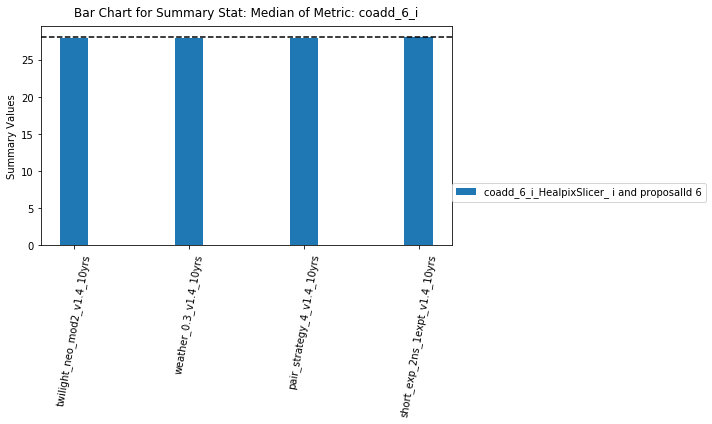

In [108]:
plotSummaryBar(resultDbs, 'coadd_6_i', 'Median', slicerName = 'HealpixSlicer', axhline=28.3)

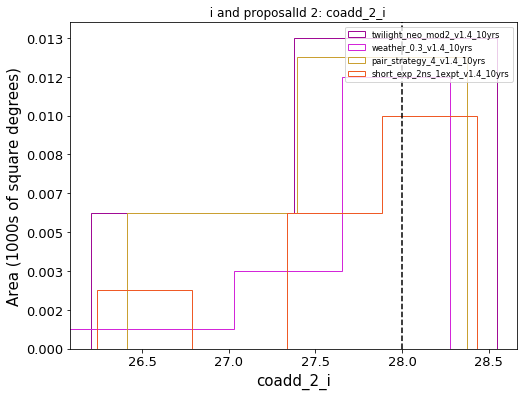

In [18]:
fn = plotHist(bundleDicts, (24, 'coadd_2_i'), axvline=28.3)

### 3. Visualize Nvisit Metric

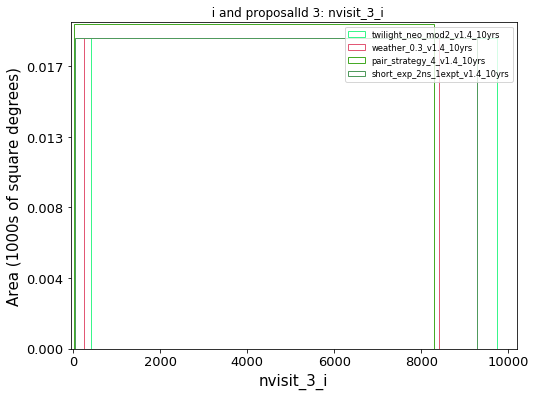

In [20]:
plotHist(bundleDicts, (27, 'nvisit_3_i'))